In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2

In [2]:
import os
print(os.listdir("C:/Users/shara/Downloads/MAJOR PROJECT"))

['.ipynb_checkpoints', '97% accuracy chest x-ray images.ipynb', 'chest_xray', 'model.h5', 'templates', 'Untitled.ipynb', 'Untitled1.ipynb']


In [3]:
DIR = os.listdir('C:/Users/shara/Downloads/MAJOR PROJECT/chest_xray')
print(DIR)

['google images', 'test', 'train', 'val']


In [4]:
train_folder = 'C:/Users/shara/Downloads/MAJOR PROJECT/chest_xray/train'
test_folder = 'C:/Users/shara/Downloads/MAJOR PROJECT/chest_xray/test'
val_folder = 'C:/Users/shara/Downloads/MAJOR PROJECT/chest_xray/val'

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [6]:
#(Image preprocessing)
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [8]:
train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)

<ipython-input-6-e03166666dd6>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


C:\Users\shara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

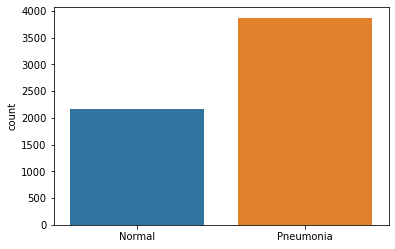

In [9]:
#classification
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)

In [10]:
#feature extraction
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

#normalization

In [11]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [12]:
X_test.shape

(6662, 50, 50)

reshape train, test and validation

In [13]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

In [14]:
X_test.shape

(6662, 50, 50, 1)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

Training the model

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), shuffle=True)
scores = model.evaluate(X_test, y_test)

#model.save("cnn.model")
model.save('model.h5')

Epoch 1/25
189/189 [==============================] - 19s 95ms/step - loss: 0.3426 - accuracy: 0.8349 - val_loss: 0.1607 - val_accuracy: 0.9409
Epoch 2/25
189/189 [==============================] - 18s 94ms/step - loss: 0.1344 - accuracy: 0.9462 - val_loss: 0.1342 - val_accuracy: 0.9516
Epoch 3/25
189/189 [==============================] - 21s 111ms/step - loss: 0.1108 - accuracy: 0.9596 - val_loss: 0.1404 - val_accuracy: 0.9560
Epoch 4/25
189/189 [==============================] - 20s 108ms/step - loss: 0.1009 - accuracy: 0.9614 - val_loss: 0.1539 - val_accuracy: 0.9531
Epoch 5/25
189/189 [==============================] - 20s 108ms/step - loss: 0.0870 - accuracy: 0.9675 - val_loss: 0.1186 - val_accuracy: 0.9590
Epoch 6/25
189/189 [==============================] - 21s 109ms/step - loss: 0.0729 - accuracy: 0.9732 - val_loss: 0.1712 - val_accuracy: 0.9453
Epoch 7/25
189/189 [==============================] - 21s 109ms/step - loss: 0.0700 - accuracy: 0.9757 - val_loss: 0.1164 - val_accu

In [17]:
#scores
print("Test loss is ===>  {} %".format(scores[0]*100))
print("Test accuracy is ===>  {} %".format(scores[1]*100))

Test loss is ===>  19.011861085891724 %
Test accuracy is ===>  97.3881721496582 %


In [18]:
y_pred = model.predict(X_test)

In [19]:
# from sklearn.metrics import classification_report
# y_pred = model.predict(X_test , batch_size=64, verbose=1)
# y_pred_bool = np.argmax(y_pred,axis=1)

# print(classification_report(y_test,y_pred_bool))

105/105 [==============================] - 3s 31ms/step
              precision    recall  f1-score   support

           0       0.36      1.00      0.53      2397
           1       0.00      0.00      0.00      4265

    accuracy                           0.36      6662
   macro avg       0.18      0.50      0.26      6662
weighted avg       0.13      0.36      0.19      6662



C:\Users\shara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

In [28]:
print(loss)
print(accuracy)
print(precision)
print(recall)

0.2961326241493225
0.9732813239097595
0.6442021131515503
0.6444377899169922


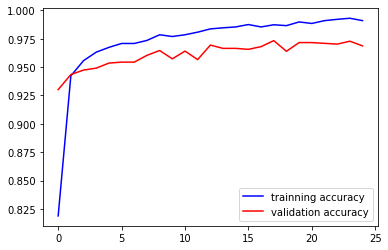

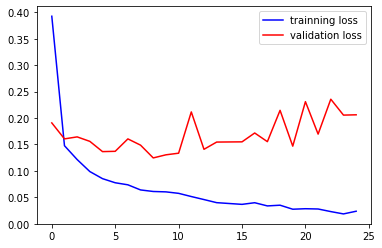

In [20]:
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [25]:
# predict classes

# prediction = model.predict_classes(X_test)
prediction = (model.predict(X_test) > 0.5).astype("int32")
prediction = prediction.reshape(1, -1)[0]
prediction[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
#correct and incorrect
# you can check tensorflow website

correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

some correct visualize

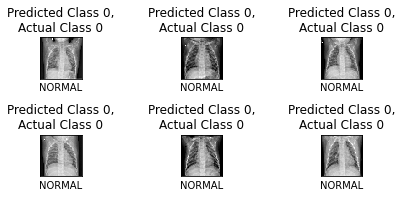

In [28]:
j = 0
for i in correct[:6]:
    plt.subplot(3,3,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},\nActual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

some incorrect visualize

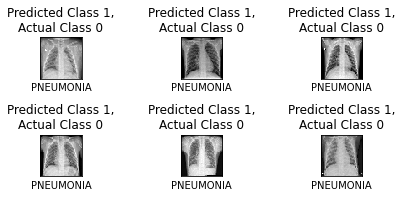

In [29]:
j = 0
for i in incorrect[:6]:
    plt.subplot(3,3,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(50,50), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},\nActual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

loading saved model

In [30]:
# load model and predict some some external photo
import tensorflow as tf
import cv2
from PIL import Image
import matplotlib.pyplot as plt
IMG_SIZE = 50
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("model.h5") # load model

In [32]:
# extra photo from google
prediction = model.predict([prepare("C:/Users/shara/Downloads/MAJOR PROJECT/chest_xray/google images/image1.jpg")])
print(labels[int(prediction[0])]) 

NORMAL


In [33]:
# extra photo from google
prediction = model.predict([prepare("C:/Users/shara/Downloads/MAJOR PROJECT/chest_xray/google images/image2.jpg")])
print(labels[int(prediction[0])])

PNEUMONIA


In [34]:
# extra photo from google
prediction = model.predict([prepare("C:/Users/shara/Downloads/MAJOR PROJECT/chest_xray/google images/image3.jpg")])
print(labels[int(prediction[0])])

NORMAL


In [35]:
# extra photo from google
prediction = model.predict([prepare("C:/Users/shara/Downloads/MAJOR PROJECT/chest_xray/google images/image4.jpg")])
print(labels[int(prediction[0])])

PNEUMONIA


In [36]:
# extra photo from google
prediction = model.predict([prepare("C:/Users/shara/Downloads/MAJOR PROJECT/chest_xray/google images/image5.jpg")])
print(labels[int(prediction[0])])

PNEUMONIA


In [38]:
%%writefile templates/index.html

<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=1">
<style>
body{
       background-image: url("https://cdn.wallpapersafari.com/12/55/IRJb1c.jpg");
       background-repeat: no-repeat;
       background-attachment: fixed;
       background-size: 100% 100%;
     }
    
    h1{
        color:red;
    font-size: 45px;
    }
    
   .center {
            margin: auto;
            width: 70%;
            padding: 50px;
            position:absolute; 
            left:490px;
            top:145px;
            color:white;
           }
      h3{
        font-size: 30px;
        color: lightblue;
        display: block;
        margin-block-start: 1em;
        margin-block-end: 1em;
        margin-inline-start: 150px;
        margin-inline-end: 0px;
        font-weight: bold;
      }
    
    p{
        color:white;
        font-size:35px;
    }

</style>

</head>
   <body>
      <form action = "http://localhost:5000/uploader" method = "POST" enctype = "multipart/form-data">
        <center><h1> Pnemonia Detection Using Chest X-Ray Images </h1></center>
        <center><p> Upload X-Ray Image</p></center>
        <div class="center">
         <input type = "file" name = "file" />
         <input type = "submit" value="Predict"/>
         <br><br>
         <img src="{{url_for('static',filename = filen)}}" alt="Pneumonia X-Ray Image" width="455" height="265"/>
         <br><br>
         <h3>{{prediction}}</h3>
        </div>
      </form>
   </body>
</html>

Overwriting templates/index.html
